In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


for this exercise at first we need to change the input value into correct form of rgb and then with cv2.cvtColor get its grayscale value

[[ 43  25  24 ...   5  45  34]
 [ 65  66   1 ...  37  45   0]
 [ 41  77  71 ...  35  63  52]
 ...
 [ 27  26  57 ...   2   8  28]
 [ 41  41  26 ...   8  41   2]
 [ 58 102  61 ...   0   4  13]]


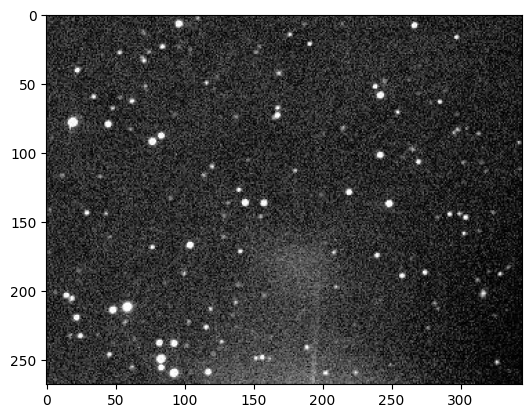

In [ ]:
with open('/content/drive/MyDrive/Computer_Vision/input5.txt', 'r') as f:
    w, h, e = map(int, f.readline().split())
    out_rgb = []
    for i in range(w):
      a  = f.readline().replace('(', '').replace(')', '').replace(',', '').split()
      out_rgb.append(np.array(a, dtype='uint8').reshape(h, 3))

rgb_image = np.array(out_rgb).reshape(w,h,3)
gray = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2GRAY)
plt.imshow(rgb_image)
print(gray)

at this step we need to get the binary form of image with the function threshold.
the threshold value which make pixel black or white can be changed due to better result

for input1 threshold is 250
for input5 threshold is 200

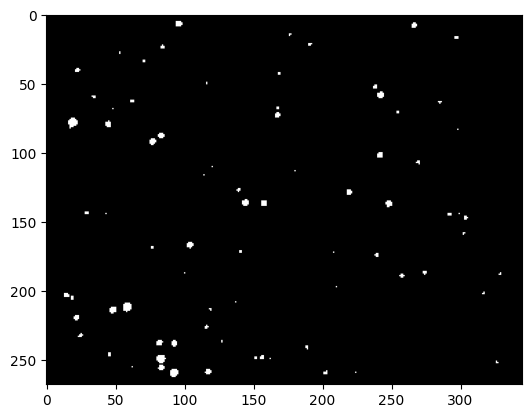

In [ ]:
_, thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)
plt.imshow(thresh, cmap='gray')


at this part with our binary image and help of the function contour we will get the area which they are connected pixels

In [ ]:
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


at the end by calculating contourd areas and comparing to min value of area we can detect our stars.

In [ ]:
total_stars = 0
stars = []
your_threshold = 8

for contour in contours:
  # print(contour)
  area = cv2.contourArea(contour)
  if area > your_threshold:

    total_stars += 1
    x, y, w, h = cv2.boundingRect(contour)
    stars.append((x, y))

print(f'Expected stars: {e}')
print(f"Detected {total_stars} stars:")
for i, (x, y) in enumerate(stars):
    print(f"Star {i+1}: ({x}, {y})")


Expected stars: 14
Detected 19 stars:
Star 1: (115, 257)
Star 2: (90, 257)
Star 3: (81, 254)
Star 4: (80, 247)
Star 5: (91, 236)
Star 6: (80, 236)
Star 7: (46, 212)
Star 8: (56, 209)
Star 9: (102, 165)
Star 10: (246, 135)
Star 11: (156, 135)
Star 12: (142, 134)
Star 13: (240, 100)
Star 14: (75, 90)
Star 15: (81, 86)
Star 16: (43, 77)
Star 17: (16, 75)
Star 18: (240, 56)
Star 19: (94, 5)
